In [582]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [583]:
#read in the data 
df=pd.read_csv("twitter_archive_master.csv")
df.timestamp=pd.to_datetime(df.timestamp)

In [584]:
df[['favorite_count','retweet_count','rating']].describe()

,favorite_count,retweet_count,rating
count,1993.000000,1993.000000,1993.000000
mean,8851.078274,2717.423984,1.168590
std,12568.967977,4692.017885,4.067757
min,80.000000,13.000000,0.000000
25%,1919.000000,607.000000,1.000000
50%,4040.000000,1309.000000,1.100000
75%,11150.000000,3123.000000,1.200000
max,143387.000000,77345.000000,177.600000


In [585]:
stage_count.sum()

306

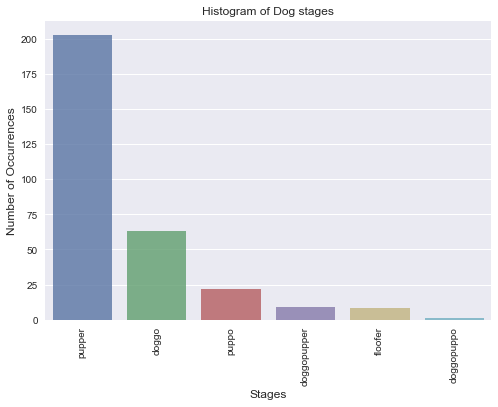

In [586]:
# making histogram og dog stages
stage_count=df.stage.value_counts()
sns.barplot(stage_count.index, stage_count.values, alpha=0.8)
plt.title('Histogram of Dog stages')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Stages', fontsize=12)
plt.xticks(rotation=90)


plt.show()

In [587]:
# Grouping the data according to rating and calculating the average of retweet_Count and favorite count
rating_grouping=(df.groupby('rating')
    .agg({'tweet_id':'count', 'favorite_count': 'mean','retweet_count' : 'mean' })
    .reset_index()
    .rename(columns={'tweet_id':'Count','favorite_count' :'Likes_mean','retweet_count':'Retweets_mean'})
)
rating_grouping

,rating,Count,Likes_mean,Retweets_mean
0,0.0,2,13583.500000,1835.000000
1,0.1,4,6955.500000,3068.500000
2,0.2,10,2415.600000,1345.200000
3,0.3,19,2334.473684,921.736842
4,0.4,15,2667.000000,1069.133333
5,0.5,34,3764.147059,1257.382353
6,0.6,32,2654.000000,1012.406250
7,0.7,51,2954.078431,1033.352941
8,0.8,95,2391.642105,875.947368
9,0.9,151,2370.516556,787.821192


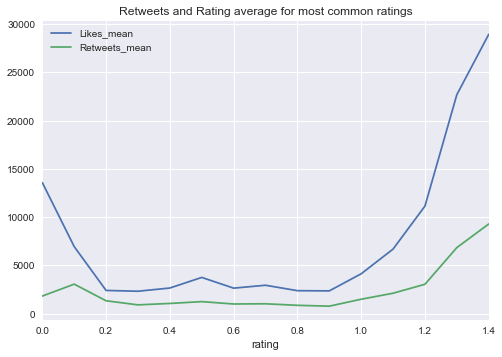

In [588]:
# plotting the most common ratings and average mean count
rating_grouping[:15][['rating','Likes_mean','Retweets_mean']].plot(x='rating',title='Retweets and Rating average for most common ratings') 
plt.show()


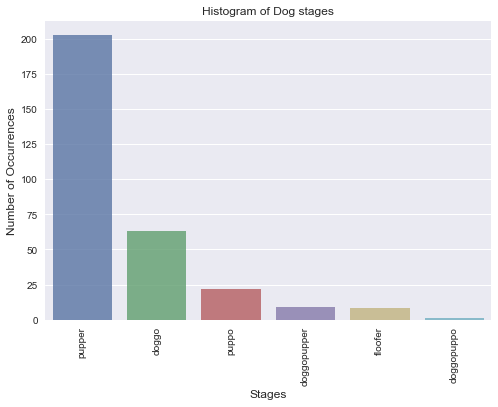

In [589]:
# making histogram og dog stages
stage_count=df.stage.value_counts()
sns.barplot(stage_count.index, stage_count.values, alpha=0.8)
plt.title('Histogram of Dog stages')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Stages', fontsize=12)
plt.xticks(rotation=90)


plt.show()

As we see here most of the dogs in this histogram were puppers. I removed the values of combinationstages like doggopupper. 

In [591]:
#for each stage how much likes and howmuch retweets
#df.stage.fillna(-1,inplace=True)

stages_grouping=(df.groupby(['stage'])
    .agg({'tweet_id':'count', 'favorite_count': 'sum','retweet_count' : 'sum','rating':'mean' })
    .reset_index()
    .rename(columns={'tweet_id':'Count','favorite_count' :'Likes','retweet_count':'Retweets'})
)
#stages_grouping['stage'].replace(-1,np.nan,inplace=True)
stages_grouping

,stage,Count,Likes,Retweets,rating
0,doggo,63,1199358,435999,1.188889
1,doggopupper,9,112150,35911,1.100000
2,doggopuppo,1,46959,18698,1.300000
3,floofer,8,107326,37048,1.187500
4,pupper,203,1450029,469722,1.071429
5,puppo,22,489268,142274,1.200000


In [592]:
df['stage'].replace(-1,np.nan,inplace=True)
df.stage

0       NaN   
1       NaN   
2       NaN   
3       NaN   
4       NaN   
5       NaN   
6       NaN   
7       NaN   
8       NaN   
9       doggo 
10      NaN   
11      NaN   
12      puppo 
13      NaN   
14      puppo 
15      NaN   
16      NaN   
17      NaN   
18      NaN   
19      NaN   
20      NaN   
21      NaN   
22      NaN   
23      NaN   
24      NaN   
25      NaN   
26      NaN   
27      NaN   
28      pupper
29      NaN   
       ...    
1963    NaN   
1964    NaN   
1965    NaN   
1966    NaN   
1967    NaN   
1968    NaN   
1969    NaN   
1970    NaN   
1971    NaN   
1972    NaN   
1973    NaN   
1974    NaN   
1975    NaN   
1976    NaN   
1977    NaN   
1978    NaN   
1979    NaN   
1980    NaN   
1981    NaN   
1982    NaN   
1983    NaN   
1984    NaN   
1985    NaN   
1986    NaN   
1987    NaN   
1988    NaN   
1989    NaN   
1990    NaN   
1991    NaN   
1992    NaN   
Name: stage, dtype: object

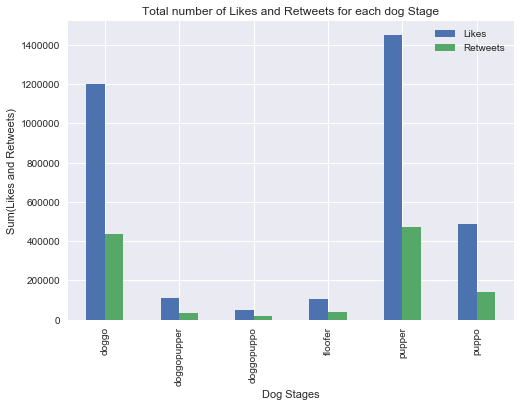

In [593]:
#stages_grouping[['Likes','Retweets']].plot(x='stage',kind='bar')
ax=stages_grouping[['Likes','Retweets']].plot( kind='bar')
plt.title("Total number of Likes and Retweets for each dog Stage")
plt.xlabel("Dog Stages")
plt.ylabel("Sum(Likes and Retweets)")
ax.set_xticklabels(stages_grouping.stage)

plt.show()

Looks like the puppers get the most retweets and likes. However on Average the pupper gets lowest number of rating the 




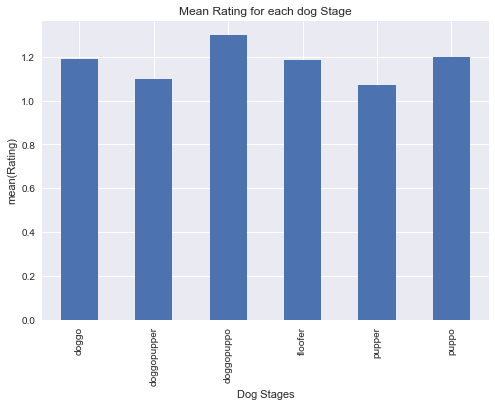

In [594]:
ax=stages_grouping['rating'].plot( kind='bar')
plt.title("Mean Rating for each dog Stage")
plt.xlabel("Dog Stages")
plt.ylabel("mean(Rating)")
ax.set_xticklabels(stages_grouping.stage)

plt.show()

the doggo puppo gets the highest rating

In [596]:
rating_sum_grouping=(df.groupby('rating')
    .agg({'tweet_id':'count', 'favorite_count': 'sum','retweet_count' : 'sum' })
    .reset_index()
    .rename(columns={'tweet_id':'Count','favorite_count' :'Likes','retweet_count':'Retweets'})
)

In [597]:
rating_sum_grouping

,rating,Count,Likes,Retweets
0,0.0,2,27167,3670
1,0.1,4,27822,12274
2,0.2,10,24156,13452
3,0.3,19,44355,17513
4,0.4,15,40005,16037
5,0.5,34,127981,42751
6,0.6,32,84928,32397
7,0.7,51,150658,52701
8,0.8,95,227206,83215
9,0.9,151,357948,118961


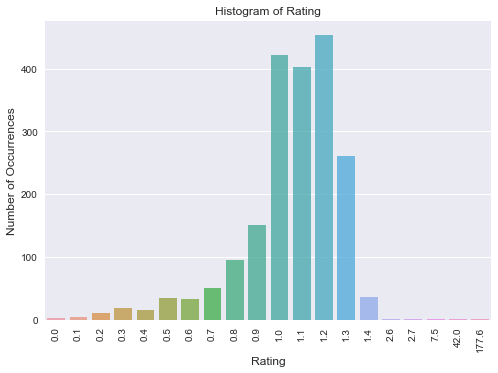

In [598]:
# creating histogram of rating
rating_count=df.rating.value_counts()
sns.barplot(rating_count.index, rating_count.values, alpha=0.8)
plt.title('Histogram of Rating')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.xticks(rotation=90)
plt.show()

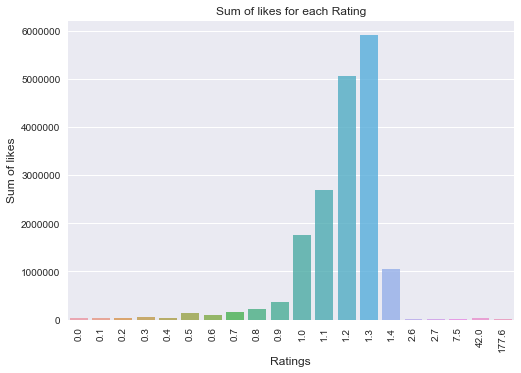

In [599]:

fig, ax = plt.subplots()

sns.barplot(rating_sum_grouping.rating, rating_sum_grouping.Likes , alpha=0.8)
plt.title('Sum of likes for each Rating')
plt.ylabel('Sum of likes', fontsize=12)
plt.xlabel('Ratings', fontsize=12)
plt.xticks(rotation=90)

#ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.show()

This most likes were for dogs with highest ratings. However the the higher the number of dogs in a group the higher the number of likes they get. In order to solve this let's divide the number of likes by number of dogs in each group.

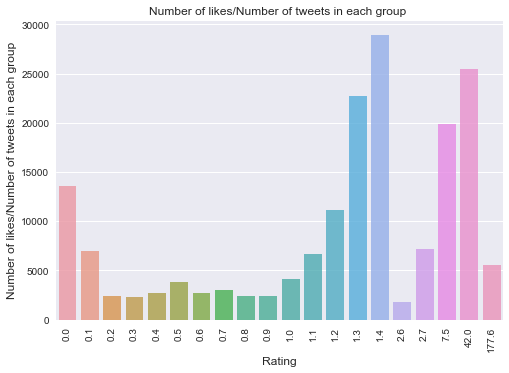

In [600]:
p=sns.barplot(rating_sum_grouping.rating, rating_sum_grouping.Likes/rating_sum_grouping.Count , alpha=0.8)

plt.xticks(rotation=90)
plt.title('Number of likes/Number of tweets in each group ')
plt.ylabel('Number of likes/Number of tweets in each group', fontsize=12)
plt.xlabel('Rating', fontsize=12)

plt.show()

As we can see in the plot above te dogs with higher rating (1.3 and 1.4 ) have the highest relative likes. However rating with 7.5 and 42.9 also get a very high number of likes. Let's check what this two groups are. 
Another interesting trend in this. 

In [601]:
df[df.rating==42]

,tweet_id,timestamp,text,name,stage,favorite_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
1717,670842764863651840,2015-11-29 05:52:33,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,NaN,NaN,25499,9288,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False,42.0


This shows picture of snoop dog with a high rating of 42 and a high relative likes. A

In [602]:
df[df.rating==7.5]

,tweet_id,timestamp,text,name,stage,favorite_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
502,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",Logan,NaN,19883,6854,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,pomeranian,0.467321,True,persian_cat,0.122978,False,chow,0.102654,True,7.5


Well the rating is unique in his case . I guess that is because he is a magical dog :) .

Let's look at what breed of dogs is the most popular in our dataset. 

In [603]:
df.p1.value_counts()

golden_retriever             138
labrador_retriever           95 
pembroke                     88 
chihuahua                    79 
pug                          54 
chow                         41 
samoyed                      40 
toy_poodle                   38 
pomeranian                   38 
malamute                     29 
cocker_spaniel               27 
french_bulldog               26 
chesapeake_bay_retriever     23 
miniature_pinscher           22 
seat_belt                    21 
german_shepherd              20 
siberian_husky               20 
staffordshire_bullterrier    19 
teddy                        18 
maltese_dog                  18 
shetland_sheepdog            18 
eskimo_dog                   18 
rottweiler                   17 
beagle                       17 
cardigan                     17 
shih-tzu                     17 
italian_greyhound            16 
kuvasz                       16 
lakeland_terrier             16 
web_site                     15 
          

It seems that golden retriever, labrador retriever, pembroke, chihuahua and pug are within our top five. Let's see which group has the highest rating. For each group I simply calculate the average rating of each dog. 


In [604]:
# Grouping by p1 with sum of favorite_count and sum of retweet_count and how many dogs in each group
dog_breed_grouping=(df.groupby('p1')
    .agg({'tweet_id':'count', 'favorite_count': 'sum','retweet_count' : 'sum' ,'rating' : 'mean'})
    .reset_index()
    .rename(columns={'tweet_id':'Count','favorite_count' :'Likes','retweet_count':'Retweets'})
)
dog_breed_grouping

,p1,Count,Likes,Retweets,rating
0,acorn_squash,2,15760,3930,1.000000
1,afghan_hound,3,50788,17370,0.966667
2,african_crocodile,1,961,271,1.000000
3,african_grey,1,5227,1256,1.100000
4,african_hunting_dog,1,1729,1172,0.800000
5,agama,1,3315,1224,1.200000
6,airedale,12,61980,16194,0.983333
7,alp,1,3061,1061,1.000000
8,american_black_bear,1,4809,1272,0.800000
9,american_staffordshire_terrier,13,96055,27777,1.100000


In [605]:
dog_breed_grouping.sort_values(by=['Count'],ascending=False,inplace=True)

dog_breed_grouping

,p1,Count,Likes,Retweets,rating
137,golden_retriever,138,1675350,490999,1.157246
183,labrador_retriever,95,1099689,355534,1.112632
246,pembroke,88,993589,274579,1.144318
77,chihuahua,79,680527,220117,1.070886
261,pug,54,313296,96180,1.024074
80,chow,41,406919,115803,1.160976
278,samoyed,40,531757,178895,1.170000
255,pomeranian,38,302983,105900,1.286842
339,toy_poodle,38,246986,90687,1.110526
205,malamute,29,250065,72434,1.089655


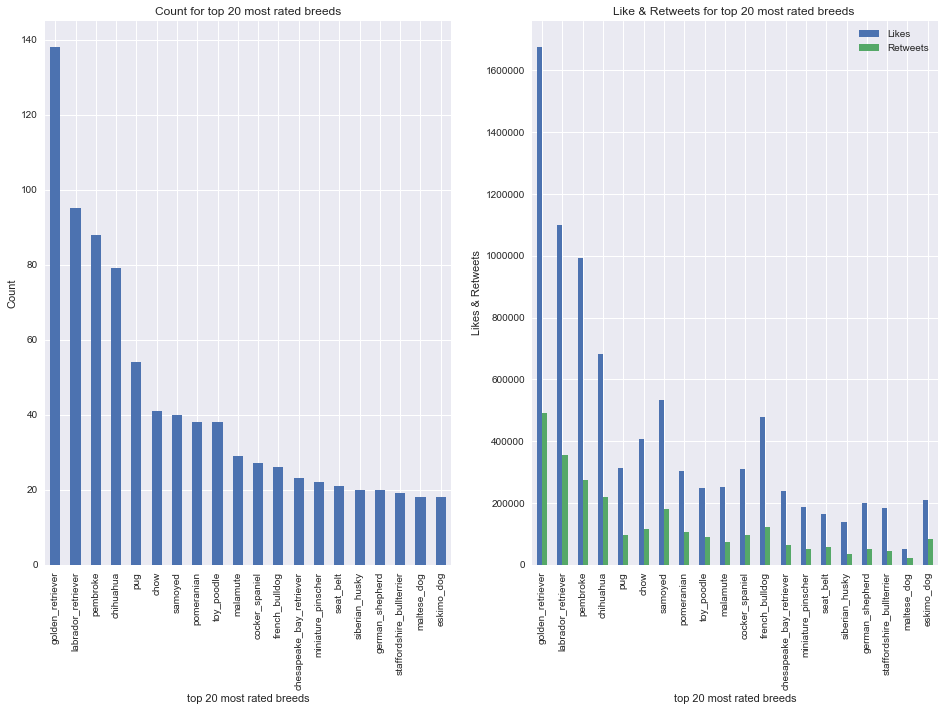

In [606]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))


dog_breed_grouping[:20][['Likes','Retweets']].plot(ax=axes[1], kind='bar')
axes[1].set_xticklabels(dog_breed_grouping[:20].p1)
axes[1].set_title('Like & Retweets for top 20 most rated breeds ')
axes[1].set_xlabel('top 20 most rated breeds')
axes[1].set_ylabel('Likes & Retweets')


dog_breed_grouping[:20]['Count'].plot(ax=axes[0], kind='bar')
axes[0].set_xticklabels(dog_breed_grouping[:20].p1)
axes[0].set_title('Count for top 20 most rated breeds')
axes[0].set_xlabel('top 20 most rated breeds')
axes[0].set_ylabel('Count')



plt.show()

In [569]:
dog_breed_grouping.sort_values(by='Count',ascending=False,inplace=True)

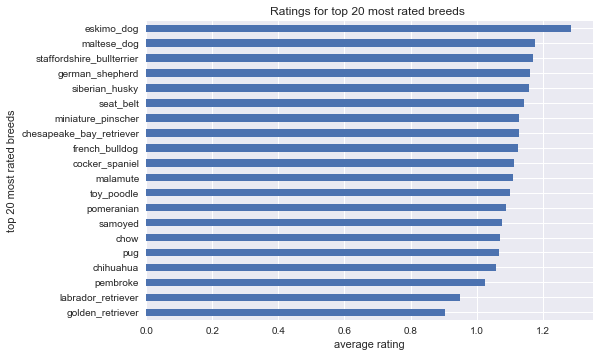

In [574]:
# Rating for each dog group
ax =dog_breed_grouping[:20].sort_values(by='rating')['rating'].plot( kind='barh')
ax.set_yticklabels(dog_breed_grouping[:20].p1)
ax.set_title('Ratings for top 20 most rated breeds ')
ax.set_ylabel('top 20 most rated breeds')
ax.set_xlabel('average rating')
plt.show()

In [567]:
dog_breed_grouping.sort_values(by='rating',ascending=False)

,p1,Count,Likes,Retweets,rating
56,bow_tie,4,11788,4549,45.15
212,microphone,1,25499,9288,42.00
84,clumber,1,7143,1823,2.70
214,military_uniform,1,13446,4021,1.40
244,pedestal,1,10074,3752,1.40
253,pole,1,32943,9039,1.40
194,limousine,1,46237,11749,1.40
187,laptop,1,66437,14923,1.40
260,prison,2,69892,28482,1.40
113,dough,1,18049,6272,1.30


In [542]:
df[df.rating==1.4]

,tweet_id,timestamp,text,name,stage,favorite_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,Cassie,doggo,31947,7473,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True,1.4
21,887517139158093824,2017-07-19 03:39:09,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such,NaN,46237,11749,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False,1.4
36,884441805382717440,2017-07-10 15:58:53,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",NaN,NaN,26989,5697,https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg,pembroke,0.993225,True,cardigan,0.003216,True,chihuahua,0.002081,True,1.4
49,881536004380872706,2017-07-02 15:32:16,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,pupper,49483,16134,https://pbs.twimg.com/ext_tw_video_thumb/881535971568889856/pu/img/9bawiZ--8FKywTkz.jpg,samoyed,0.281463,True,angora,0.272066,False,persian_cat,0.114854,False,1.4
64,878057613040115712,2017-06-23 01:10:23,This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://t.co/cwtWnHMVpe,Emmy,NaN,42087,6915,https://pbs.twimg.com/media/DC98vABUIAA97pz.jpg,french_bulldog,0.839097,True,boston_bull,0.078799,True,toy_terrier,0.015243,True,1.4
95,870063196459192321,2017-05-31 23:43:25,Meet Clifford. He's quite large. Also red. Good w kids. Somehow never steps on them. Massive poops very inconvenient. Still 14/10 would ride https://t.co/apVOyDgOju,Clifford,NaN,37019,8570,https://pbs.twimg.com/media/DBMV3NnXUAAm0Pp.jpg,comic_book,0.534409,False,envelope,0.280722,False,book_jacket,0.043786,False,1.4
100,868880397819494401,2017-05-28 17:23:24,This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF,Walter,NaN,66437,14923,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,laptop,0.153718,False,french_bulldog,0.099984,True,printer,0.077130,False,1.4
113,864873206498414592,2017-05-17 16:00:15,We only rate dogs. Please don't send in Jesus. We're trying to remain professional and legitimate. Thank you... 14/10 https://t.co/wr3xsjeCIR,NaN,NaN,32943,9039,https://pbs.twimg.com/media/DAClmHkXcAA1kSv.jpg,pole,0.478616,False,lakeside,0.114182,False,wreck,0.055926,False,1.4
119,863079547188785154,2017-05-12 17:12:53,"Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",NaN,NaN,8957,1145,https://pbs.twimg.com/media/C_pGRInUwAAmTY_.jpg,lakeland_terrier,0.275242,True,airedale,0.190569,True,teddy,0.102595,False,1.4
131,860184849394610176,2017-05-04 17:30:24,"Here we have perhaps the wisest dog of all. Above average with light sabers. Immortal as h*ck. 14/10 dog, or dog not, there is no try https://t.co/upRYxG4KbG",NaN,NaN,17127,6111,https://pbs.twimg.com/media/C-_9jWWUwAAnwkd.jpg,chimpanzee,0.267612,False,gorilla,0.104293,False,orangutan,0.059908,False,1.4


In [543]:
df[df.rating==42]

,tweet_id,timestamp,text,name,stage,favorite_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
1717,670842764863651840,2015-11-29 05:52:33,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,NaN,NaN,25499,9288,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False,42.0


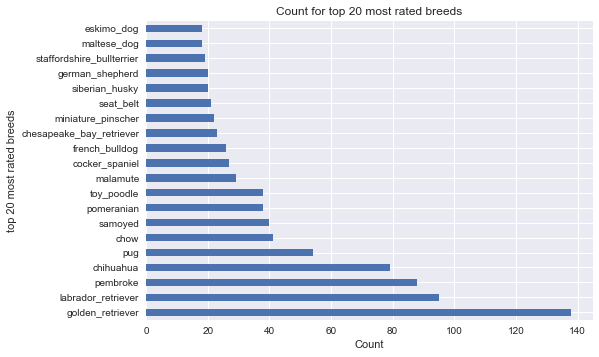

In [607]:
ax=dog_breed_grouping.sort_values(by='Count',ascending=False)[:20]['Count'].plot( kind='barh')
ax.set_yticklabels(dog_breed_grouping.sort_values(by='Count',ascending=False)[:20].p1)
ax.set_title('Count for top 20 most rated breeds')
ax.set_ylabel('top 20 most rated breeds')
ax.set_xlabel('Count')
plt.show()

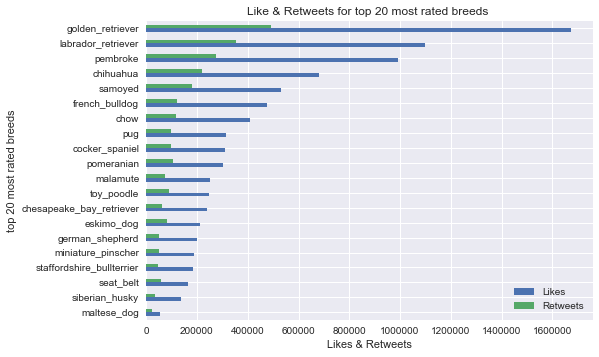

In [608]:
ax=dog_breed_grouping[:20].sort_values(by="Likes")[['Likes','Retweets']].plot( kind='barh')
ax.set_yticklabels(dog_breed_grouping[:20].sort_values(by="Likes").p1)
ax.set_title('Like & Retweets for top 20 most rated breeds ')
ax.set_ylabel('top 20 most rated breeds')
ax.set_xlabel('Likes & Retweets')
plt.show()

In [609]:
dog_breed_grouping.sort_values(by="Likes",ascending=False)

,p1,Count,Likes,Retweets,rating
137,golden_retriever,138,1675350,490999,1.157246
183,labrador_retriever,95,1099689,355534,1.112632
246,pembroke,88,993589,274579,1.144318
77,chihuahua,79,680527,220117,1.070886
278,samoyed,40,531757,178895,1.170000
129,french_bulldog,26,476537,122490,1.126923
80,chow,41,406919,115803,1.160976
261,pug,54,313296,96180,1.024074
85,cocker_spaniel,27,309049,97507,1.129630
255,pomeranian,38,302983,105900,1.286842
